In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

np.random.seed(1)

In [2]:
iris = pd.read_csv("Iris.csv") #load the dataset
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [3]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

try:
    iris.drop('Id', axis=1, inplace=True)
except:
    pass

y = iris['Species']
print ('Class Labels =', np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)

# input features are stored in X
try:
    X = iris.drop('Species', axis=1)
except:
    pass

print (X.describe())
print ("")
y = pd.DataFrame(y)

Class Labels = ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000



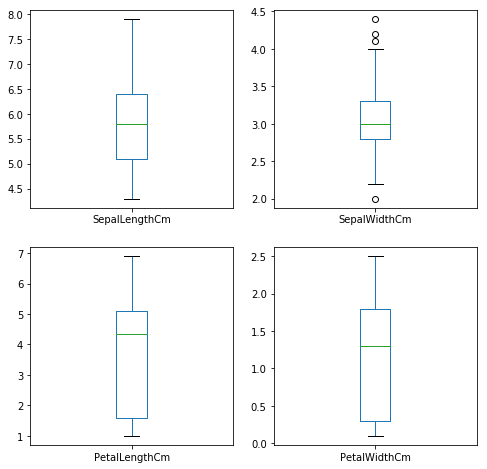

In [5]:
import matplotlib.pyplot as plt

# Box Plot 
X.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(8, 8))
plt.show()

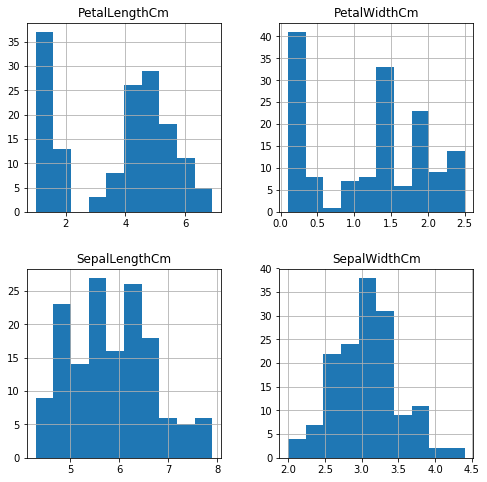

In [6]:
# histogram
X.hist(figsize=(8, 8))
plt.show()

/home/ashish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


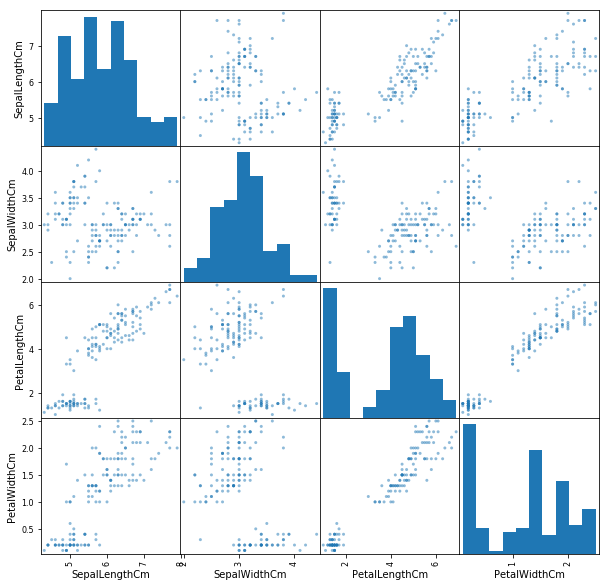

In [7]:
from pandas.tools.plotting import scatter_matrix

# scatter pllot
scatter_matrix(X, figsize=(10, 10))
plt.show()

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
y_train = pd.DataFrame.as_matrix(y_train).ravel()

/home/ashish/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

lr = LogisticRegression()
nb = GaussianNB()
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
forest = RandomForestClassifier(criterion='entropy', n_estimators=10)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
svm = SVC(kernel='linear', C=1.0)

models, results, names = [], [], []
models.append(('LR', lr))
models.append(('NB', nb))
models.append(('DTC', tree))
models.append(('RF', forest))
models.append(('KNN', knn))
models.append(('SVM', svm))

kfold = KFold(n_splits=10, random_state=seed)
m = -1
print ('%6s %12s %5s' %('Model', 'Accuracy', 'SD'))
print ('--------------------------------')
for name, model in models:
    score = cross_val_score(estimator=model, X=X_train_std, y=y_train, cv=kfold)
    results.append(score)
    names.append(name)
    print ('%5s %12.3f  %5.3f' %(name, np.mean(score),np.std(score)))
    
    if np.mean(score) > m:
        m = np.mean(score)
        best = name
    elif np.mean(score) == m:
        if np.std(score):
            best = name
            
print ('\nBEST CLASSIFIER =', best)

 Model     Accuracy    SD
--------------------------------
   LR        0.908  0.079
   NB        0.975  0.053
  DTC        0.975  0.038
   RF        0.967  0.041
  KNN        0.967  0.041
  SVM        0.975  0.038

BEST CLASSIFIER = SVM


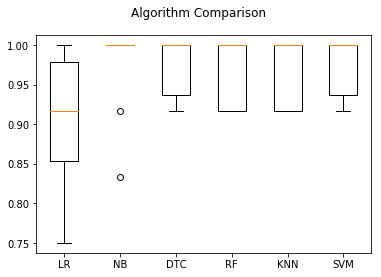

In [10]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

print ('Accuracy = %.3f' %(accuracy_score(y_test, y_pred)))
print ('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print ('\nClassification Report\n', classification_report(y_test, y_pred))

Accuracy = 0.900

Confusion Matrix
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]

Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.91      0.83      0.87        12
          2       0.83      0.91      0.87        11

avg / total       0.90      0.90      0.90        30

